In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Read csv
data_2014 = pd.read_csv("1-Data/OSMI 2014 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv")
data_2014.head()
data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
#Obtain total number of participants in survey
total_participants=data_2014.shape[0]
print("The total number of participants in the 2019 survey was "+str(total_participants))

The total number of participants in the 2019 survey was 1259


In [5]:
#Checking for any nill values
display(data_2014["benefits"].isnull().sum())
display(data_2014["care_options"].isnull().sum())

0

0

,Response,No of Response,Total Participants,%
0,Yes,477,1259,38.0
1,Don't know,408,1259,32.0
2,No,374,1259,30.0


Text(0, 0.5, '%')

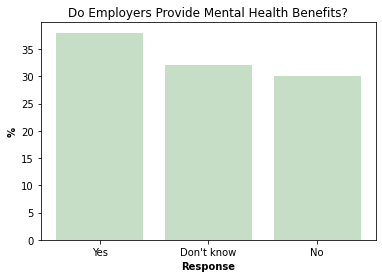

In [6]:
#Creating data frame for benefits offered
benefits_awareness=pd.DataFrame(data_2014['benefits'].value_counts())
benefits_awareness["Total Participants"]=total_participants
benefits_awareness.reset_index(inplace=True)
benefits_awareness=benefits_awareness.rename(columns={"index":"Response","benefits":"No of Response"})
benefits_awareness["%"]=round((benefits_awareness["No of Response"]/benefits_awareness["Total Participants"])*100,0)
display(benefits_awareness)

#Creating bar chart to display the results
plt.bar(benefits_awareness["Response"],benefits_awareness["%"], color='darkseagreen', alpha=0.5, align="center")
#plt.xticks(rotation="vertical")
plt.title("Do Employers Provide Mental Health Benefits?")
plt.xlabel("Response",fontweight = "bold")
plt.ylabel("%",fontweight = "bold")

,Response,Participants Count,Total Participants,%
0,No,501,1259,40.0
1,Yes,444,1259,35.0
2,Not sure,314,1259,25.0


Text(0, 0.5, '%')

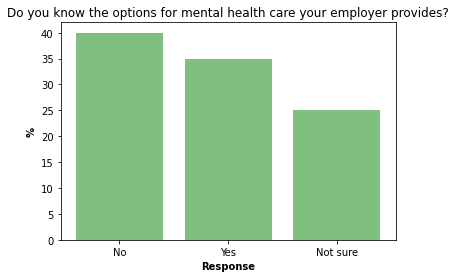

In [7]:
care_options=pd.DataFrame(data_2014["care_options"].value_counts())
care_options["Total Participants"]=total_participants
care_options.reset_index(inplace=True)
care_options=care_options.rename(columns={"index":"Response","care_options":"Participants Count"})
care_options["%"]=round((care_options["Participants Count"]/care_options["Total Participants"])*100,0)
display(care_options)

#Creating bar chart to display the results
plt.bar(care_options["Response"],care_options["%"], color='g', alpha=0.5, align="center")
#plt.xticks(rotation="vertical")
plt.title("Do you know the options for mental health care your employer provides?")
plt.xlabel("Response",fontweight = "bold")
plt.ylabel("%",fontweight = "bold")

## Do companies provide mental health benefits?

% of non-tech companies providing mental health benefits


,Response,Participants Count,Total Participants,%
0,Don't know,73,228,32.0
1,No,51,228,22.0
2,Yes,104,228,46.0


% of tech companies providing mental health benefits


,Response,Participants Count,Total Participants,%
0,Don't know,335,1031,32.0
1,No,323,1031,31.0
2,Yes,373,1031,36.0


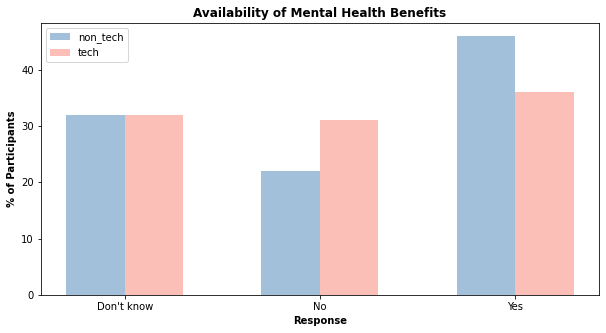

In [8]:
#non_tech
benefits=data_2014.groupby("tech_company")
non_tech=benefits.get_group("No")
non_tech=pd.DataFrame(non_tech.groupby("benefits").size())
non_tech.reset_index(inplace=True)
non_tech=non_tech.rename(columns={"benefits":"Response",0:"Participants Count"})
non_tech["Total Participants"]=non_tech.iloc[:,1].sum()
non_tech["%"]=round((non_tech["Participants Count"]/non_tech["Total Participants"])*100,0)
print("% of non-tech companies providing mental health benefits")
display(non_tech)

#tech
benefits=data_2014.groupby("tech_company")
tech=benefits.get_group("Yes")
tech=pd.DataFrame(tech.groupby("benefits").size())
tech.reset_index(inplace=True)
tech=tech.rename(columns={"benefits":"Response",0:"Participants Count"})
tech["Total Participants"]=tech.iloc[:,1].sum()
tech["%"]=round((tech["Participants Count"]/tech["Total Participants"])*100,0)
print("% of tech companies providing mental health benefits")
display(tech)


#Generating barcharts

# Numbers of pairs of bars
N = 3

# Data on X-axis
X1 = non_tech["%"]
X2 = tech["%"]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, X1 , width, label='non_tech', color="steelblue", alpha=0.5)
plt.bar(ind + width, X2, width, label='tech', color="salmon", alpha=0.5)

plt.xlabel("Response", fontweight = "bold")
plt.ylabel("% of Participants", fontweight = "bold")
plt.title("Availability of Mental Health Benefits", fontweight = "bold")

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ("Don't know", 'No', 'Yes'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()


### Insight

The bar chart above looks at the responses of employees in tech and non-tech companies regarding mental health benefits provided by their employers. 46% of employees of non-tech companies said that their employers provide mental health benefits compared to 36% for tech companies. However in both instances 32% of employees were not aware if their companies did or did not provide mental health benefits. 

Percentage of Employees aware of how to seek help in non tech companies


,Response,Participants Count,Total Participants,%
0,Don't know,67,228,29.0
1,No,92,228,40.0
2,Yes,69,228,30.0


Percentage of Employees aware of how to seek help in tech companies


,Response,Participants Count,Total Participants,%
0,Don't know,296,1031,29.0
1,No,554,1031,54.0
2,Yes,181,1031,18.0


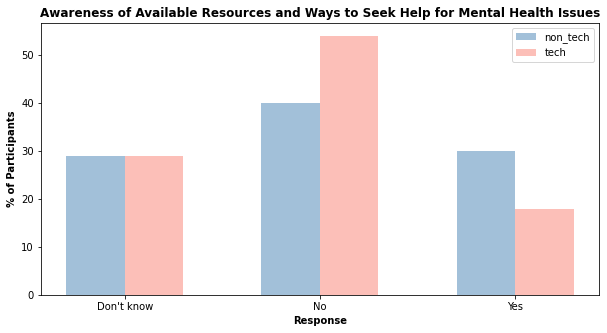

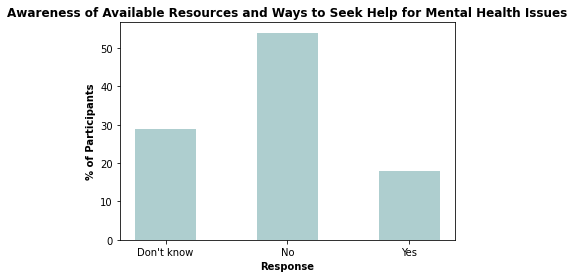

In [17]:
#seek help
#non_tech
seek_help=data_2014.groupby("tech_company")
non_tech1=seek_help.get_group("No")
non_tech1=pd.DataFrame(non_tech1.groupby("seek_help").size())
non_tech1.reset_index(inplace=True)
non_tech1=non_tech1.rename(columns={"seek_help":"Response",0:"Participants Count"})
non_tech1["Total Participants"]=non_tech1.iloc[:,1].sum()
non_tech1["%"]=round((non_tech1["Participants Count"]/non_tech1["Total Participants"])*100,0)
print("Percentage of Employees aware of how to seek help in non tech companies")
display(non_tech1)

#tech
seek_help=data_2014.groupby("tech_company")
tech1=seek_help.get_group("Yes")
tech1=pd.DataFrame(tech1.groupby("seek_help").size())
tech1.reset_index(inplace=True)
tech1=tech1.rename(columns={"seek_help":"Response",0:"Participants Count"})
tech1["Total Participants"]=tech1.iloc[:,1].sum()
tech1["%"]=round((tech1["Participants Count"]/tech1["Total Participants"])*100,0)
print("Percentage of Employees aware of how to seek help in tech companies")
display(tech1)

# Numbers of pairs of bars you want
N = 3

# Data on X-axis
X3 = non_tech1["%"]
X4 = tech1["%"]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, X3 , width, label='non_tech',color="steelblue",alpha=0.5)
plt.bar(ind + width, X4, width, label='tech',color="salmon",alpha=0.5)

plt.xlabel("Response",fontweight = "bold")
plt.ylabel("% of Participants", fontweight = "bold")
plt.title("Awareness of Available Resources and Ways to Seek Help for Mental Health Issues",fontweight = "bold")

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ("Don't know", 'No', 'Yes'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

# Plotting
plt.bar(ind, X4, 0.5, label='tech',color="cadetblue",alpha=0.5)
plt.xlabel("Response",fontweight = "bold")
plt.ylabel("% of Participants", fontweight = "bold")
plt.title("Awareness of Available Resources and Ways to Seek Help for Mental Health Issues",fontweight = "bold")

plt.xticks(ind, ("Don't know", 'No', 'Yes'))

plt.show()

### Insight

54% of employees of tech companies said that their employers did not provide resources to learn more about mental health issues or how to seek help. This suggests that awareness of the benefits, discussions about such issues and resources for additional help are quite limited in the tech workplaces and have room for improvement.